# <B> Amazon Textract examples </B>
* Data: s3://lge-nerp-dx-poc-textract/LGE-PoC-Data/

## AutoReload

%load_ext autoreload
%autoreload 2

## 1. parameter store 셋팅

In [22]:
import boto3
from utils.ssm import parameter_store

In [23]:
strRegionName=boto3.Session().region_name
pm = parameter_store(strRegionName)
strPrefix = pm.get_params(key="PREFIX")

## 2. Sample codes

In [154]:
from utils.textract import textract_handler
textract = textract_handler()

This is a S3 handler with [None] region.
This is a Textract handler.


### 2.1 detect-text-local for images

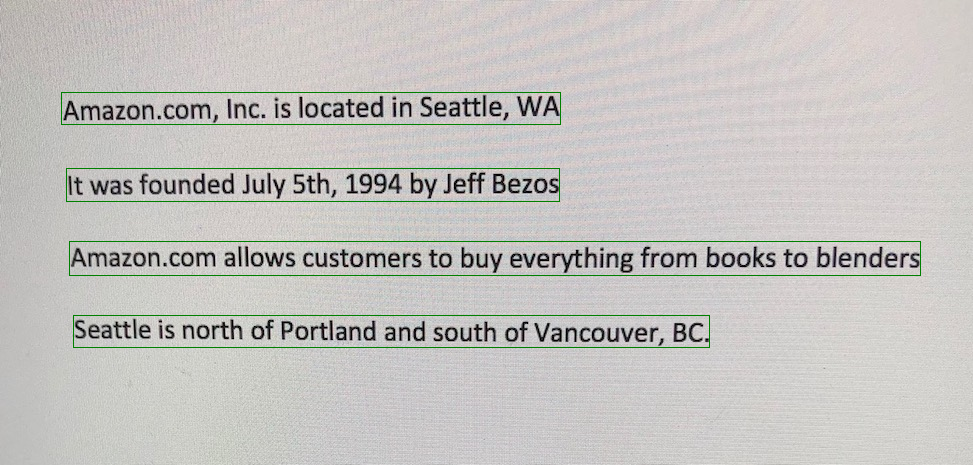

0 Amazon.com, Inc. is located in Seattle, WA {'Width': 0.512660026550293, 'Height': 0.06824082136154175, 'Left': 0.06333211064338684, 'Top': 0.1989629715681076}
1 It was founded July 5th, 1994 by Jeff Bezos {'Width': 0.5065407752990723, 'Height': 0.06899020075798035, 'Left': 0.06820254772901535, 'Top': 0.36328956484794617}
2 Amazon.com allows customers to buy everything from books to blenders {'Width': 0.874902606010437, 'Height': 0.07273019105195999, 'Left': 0.07118041068315506, 'Top': 0.5195279121398926}
3 Seattle is north of Portland and south of Vancouver, BC. {'Width': 0.6536551117897034, 'Height': 0.06737809628248215, 'Left': 0.07521340996026993, 'Top': 0.6793993711471558}


In [158]:
textract.detect_text(
    doc_name="./test-documents/simple-document-image.jpg",
    #doc_name="./test-documents/two-column-image.jpg",
    detail=False
)

### 2.2 detect-text-s3 for images

* Upload data

In [160]:
from utils.s3 import s3_handler
s3 = s3_handler()

This is a S3 handler with [None] region.


In [161]:
source_dir, target_bucket, target_dir = "./test-documents", pm.get_params(key=strPrefix+"DATA-BUCKET"), "test-documents"
s3.upload_dir(source_dir, target_bucket, target_dir)

Upload:[./test-documents] was uploaded to [s3://lge-nerp-dx-poc-textract/test-documents]successfully


* Detect text

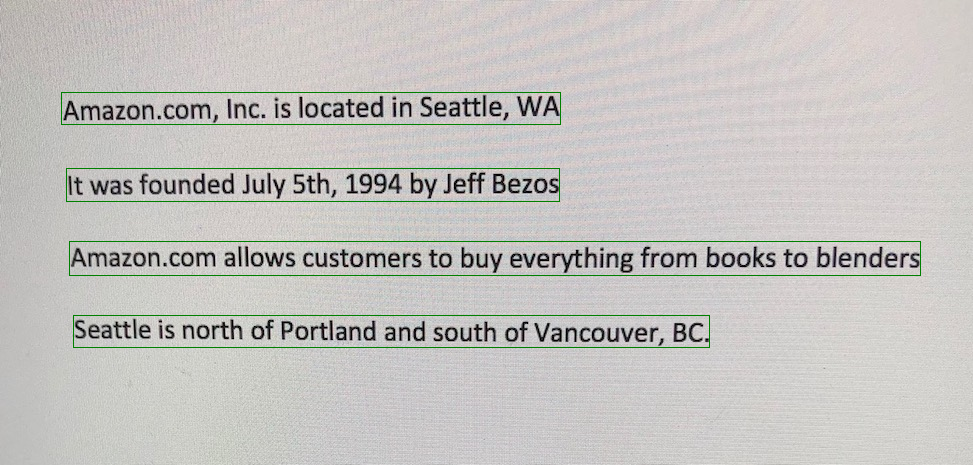

0 Amazon.com, Inc. is located in Seattle, WA {'Width': 0.512660026550293, 'Height': 0.06824082136154175, 'Left': 0.06333211064338684, 'Top': 0.1989629715681076}
1 It was founded July 5th, 1994 by Jeff Bezos {'Width': 0.5065407752990723, 'Height': 0.06899020075798035, 'Left': 0.06820254772901535, 'Top': 0.36328956484794617}
2 Amazon.com allows customers to buy everything from books to blenders {'Width': 0.874902606010437, 'Height': 0.07273019105195999, 'Left': 0.07118041068315506, 'Top': 0.5195279121398926}
3 Seattle is north of Portland and south of Vancouver, BC. {'Width': 0.6536551117897034, 'Height': 0.06737809628248215, 'Left': 0.07521340996026993, 'Top': 0.6793993711471558}


In [163]:
textract.detect_text(
    doc_name="test-documents/simple-document-image.jpg",
    detail=False,
    bucket_name=pm.get_params(key=strPrefix+"DATA-BUCKET"),
    doc_location="s3"
)

## 2.3 detect-text-s3 for PDF

index: 0


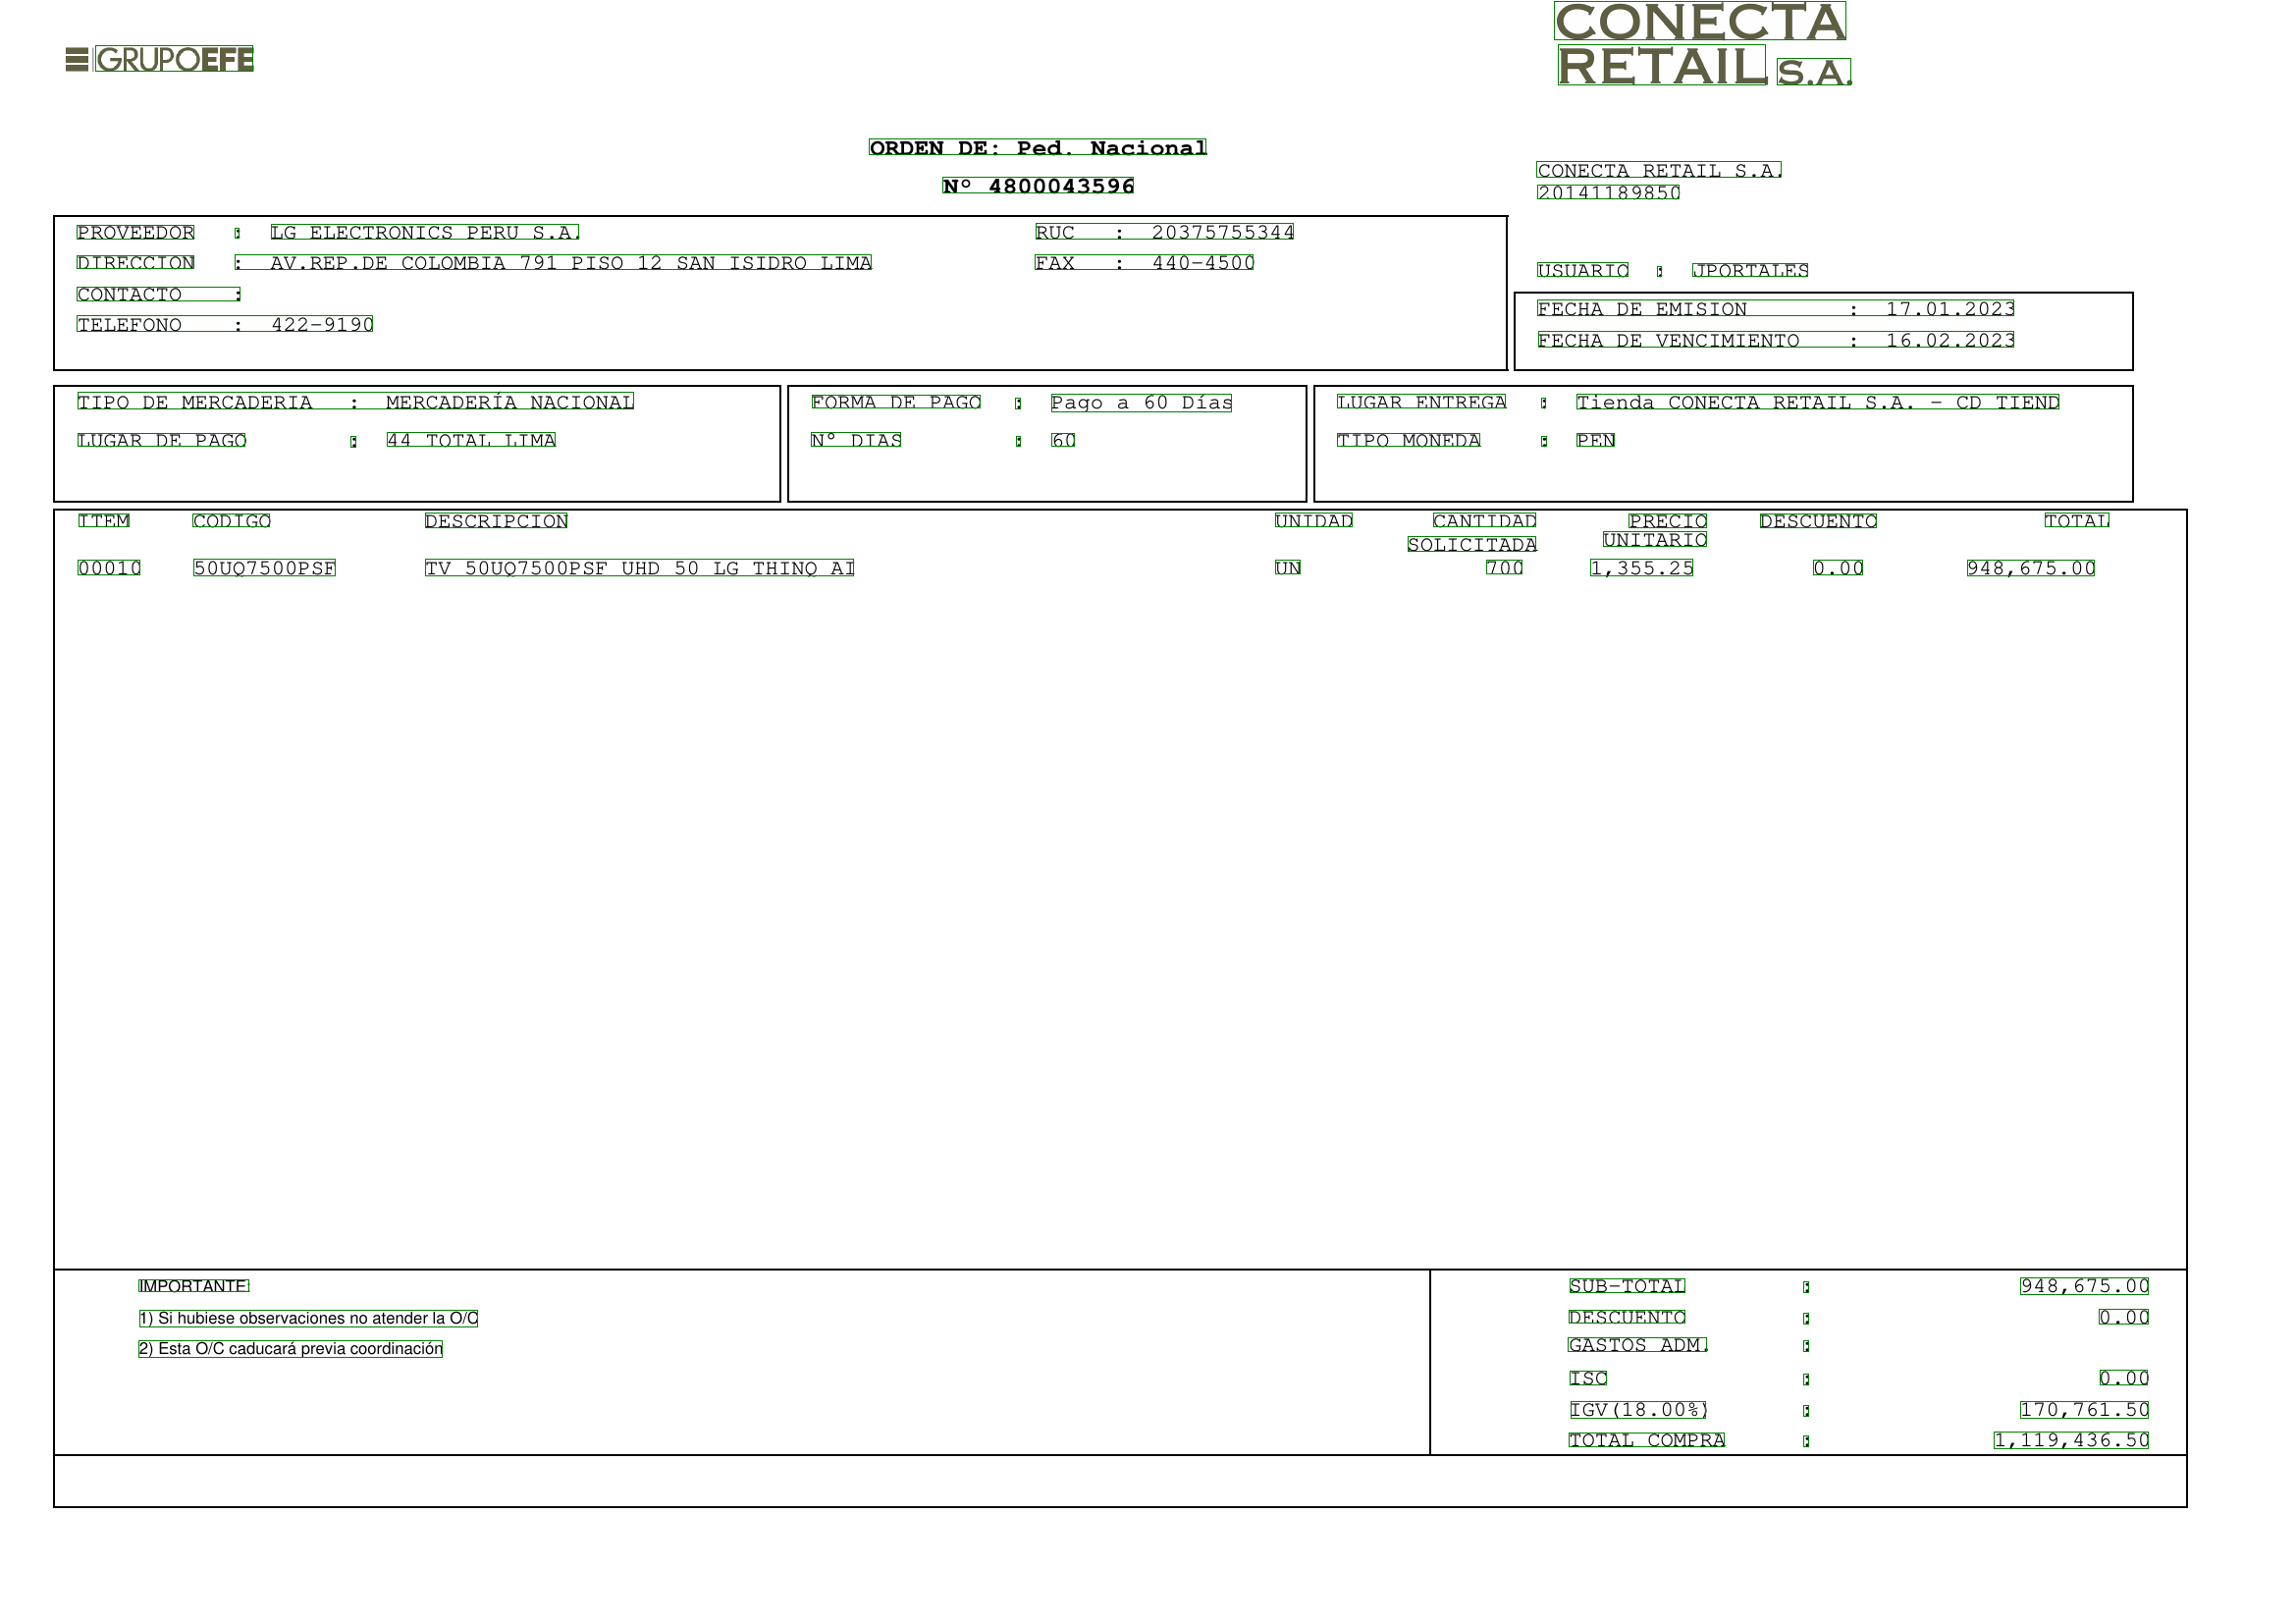

0 CONECTA {'Width': 0.1270463466644287, 'Height': 0.023893078789114952, 'Left': 0.6769386529922485, 'Top': 0.0007128409342840314}
1 GRUPOEFE {'Width': 0.06831280887126923, 'Height': 0.015256662853062153, 'Left': 0.04173443838953972, 'Top': 0.028345433995127678}
2 RETAIL {'Width': 0.09028887003660202, 'Height': 0.024953113868832588, 'Left': 0.6785193681716919, 'Top': 0.02764163538813591}
3 S.A. {'Width': 0.03191342204809189, 'Height': 0.016359908506274223, 'Left': 0.7741163372993469, 'Top': 0.03625635430216789}
4 ORDEN DE: Ped. Nacional {'Width': 0.14658893644809723, 'Height': 0.009743490256369114, 'Left': 0.3787500560283661, 'Top': 0.08577881008386612}
5 CONECTA RETAIL S.A. {'Width': 0.10629812628030777, 'Height': 0.009131970815360546, 'Left': 0.6694791316986084, 'Top': 0.0998140275478363}
6 N° 4800043596 {'Width': 0.08283180743455887, 'Height': 0.009390045888721943, 'Left': 0.4106132686138153, 'Top': 0.1093352884054184}
7 20141189850 {'Width': 0.061625927686691284, 'Height': 0.0087783

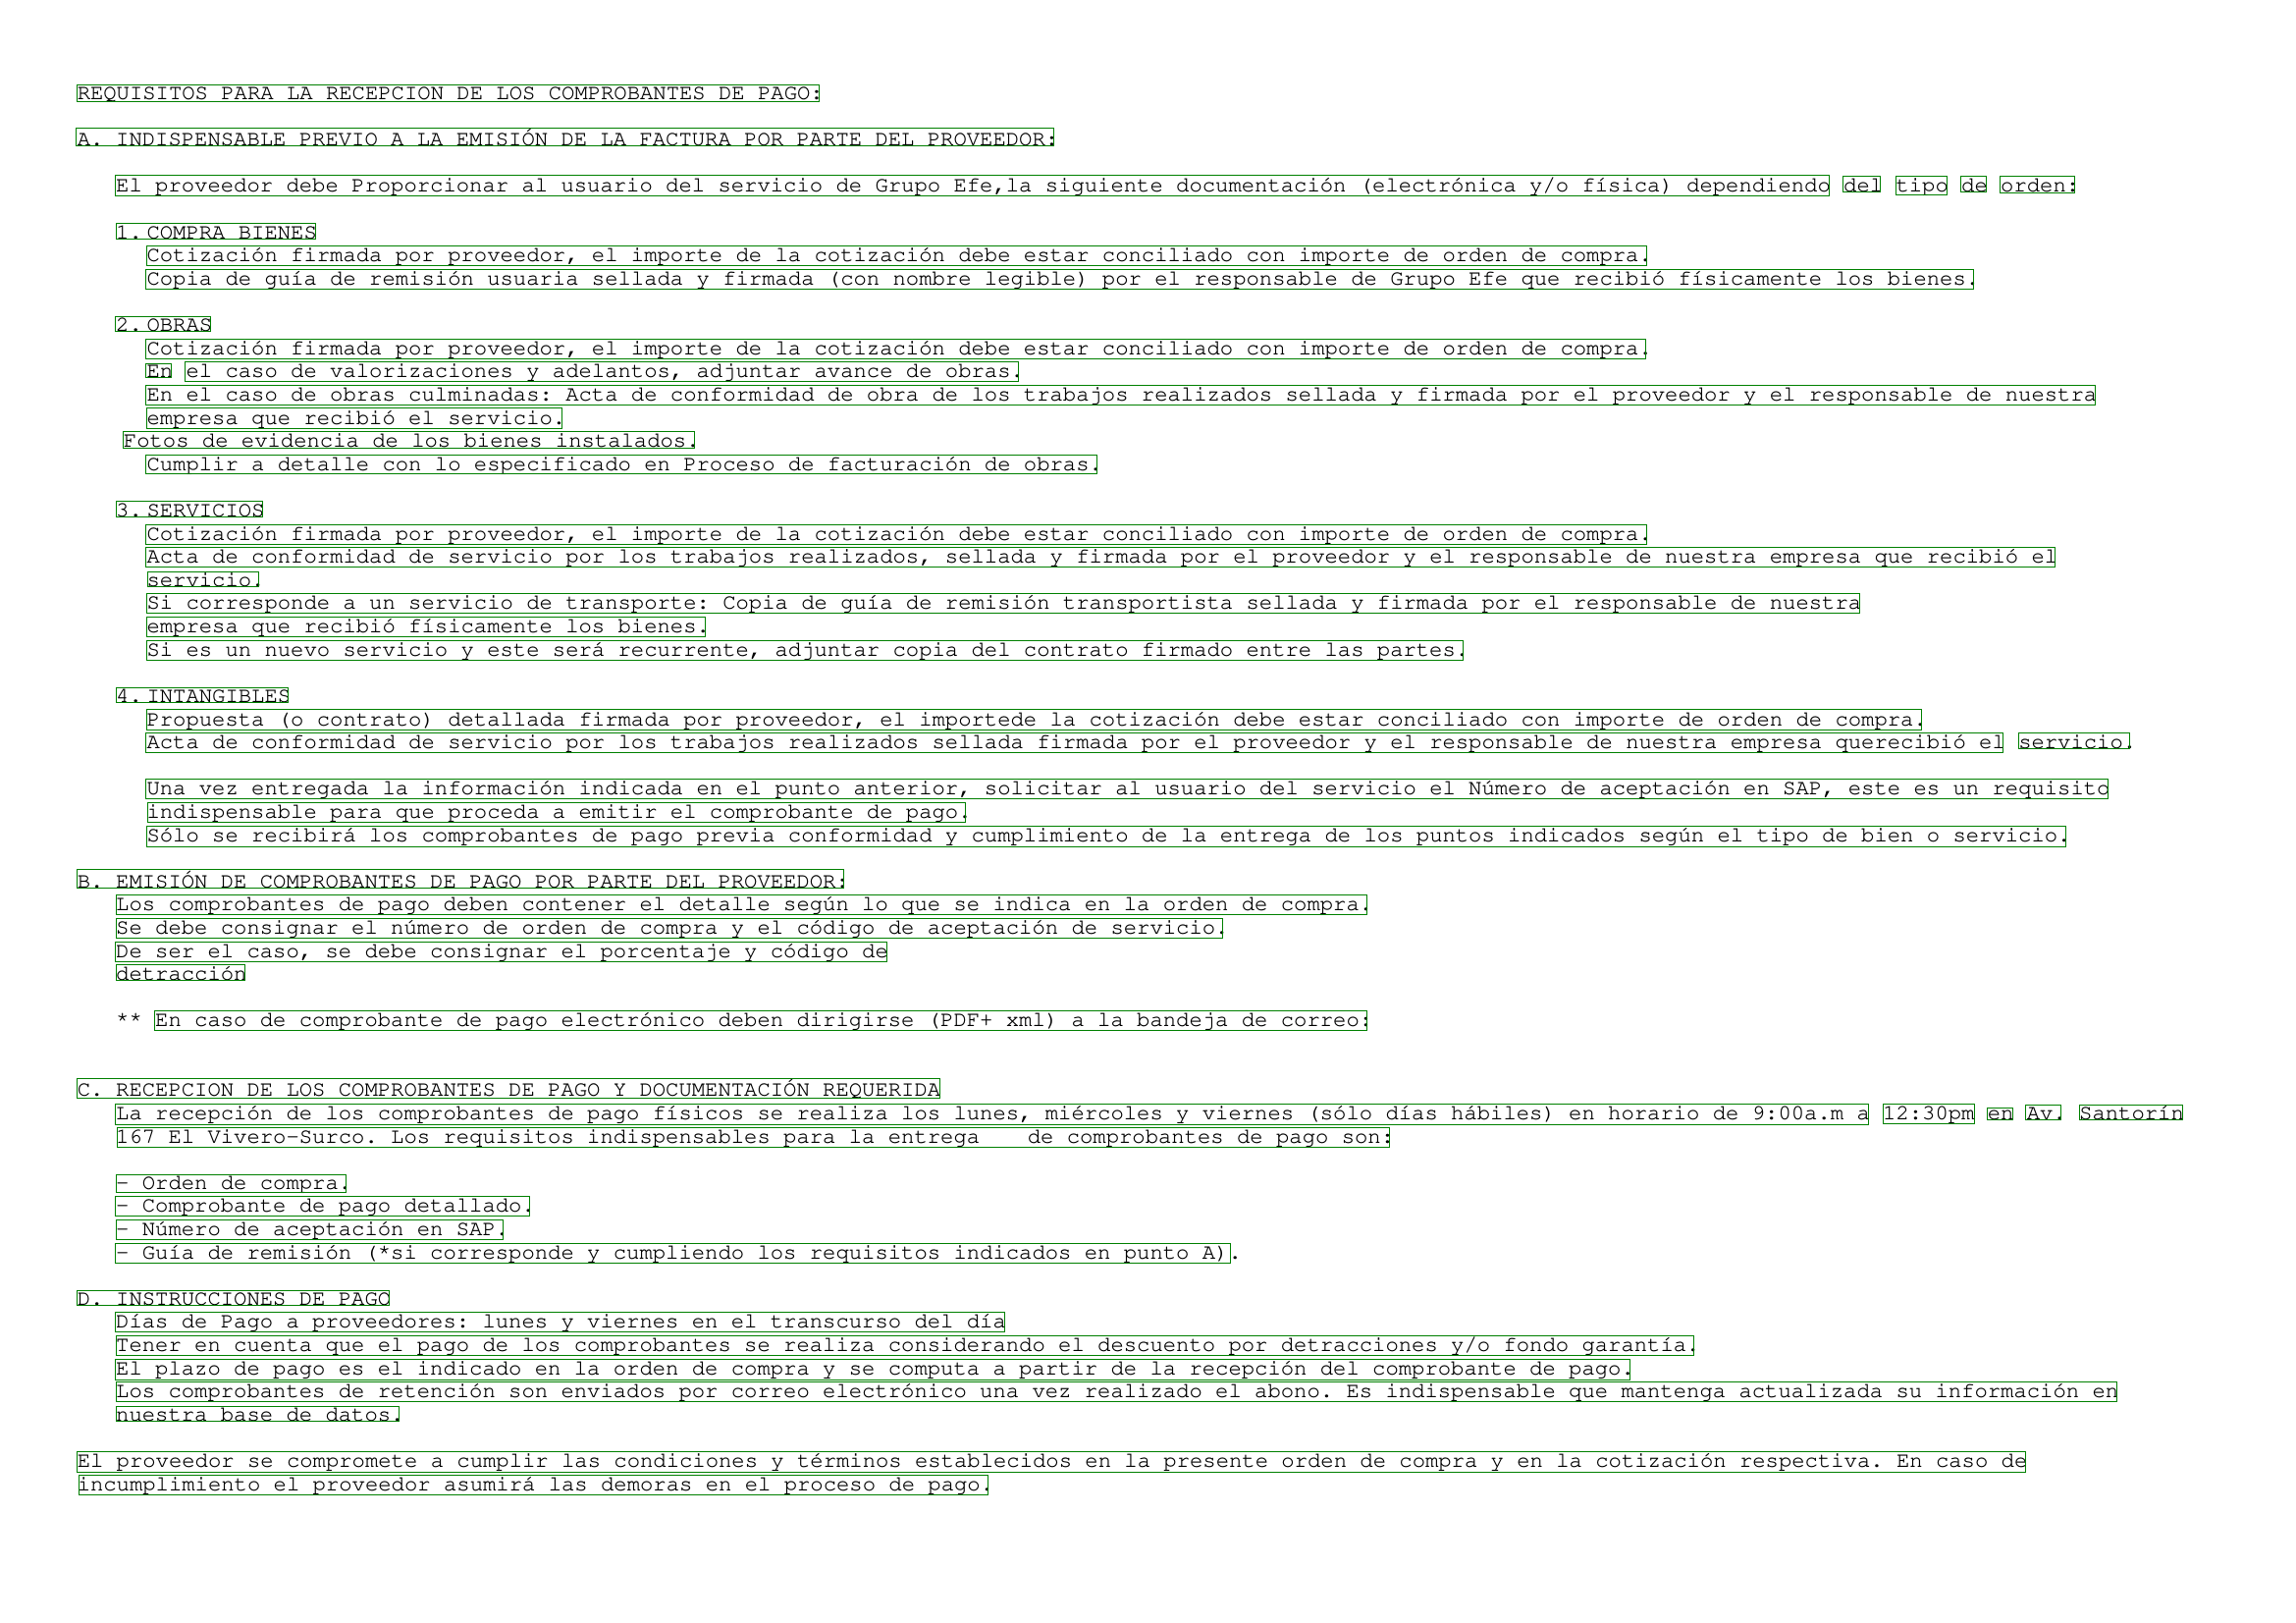

0 REQUISITOS PARA LA RECEPCION DE LOS COMPROBANTES DE PAGO: {'Width': 0.32300400733947754, 'Height': 0.01057608425617218, 'Left': 0.03372107446193695, 'Top': 0.05204681679606438}
1 A. INDISPENSABLE PREVIO A LA EMISIÓN DE LA FACTURA POR PARTE DEL PROVEEDOR: {'Width': 0.4258172810077667, 'Height': 0.010885077528655529, 'Left': 0.0331256128847599, 'Top': 0.07904377579689026}
2 El proveedor debe Proporcionar al usuario del servicio de Grupo Efe, la siguiente documentación (electrónica y/o física) dependiendo {'Width': 0.7466531991958618, 'Height': 0.012718528509140015, 'Left': 0.05020160973072052, 'Top': 0.10804910212755203}
3 del {'Width': 0.016226578503847122, 'Height': 0.009715176187455654, 'Left': 0.802752673625946, 'Top': 0.10862047225236893}
4 tipo {'Width': 0.02208726853132248, 'Height': 0.01154125016182661, 'Left': 0.825803279876709, 'Top': 0.1087849885225296}
5 de {'Width': 0.010854750871658325, 'Height': 0.00970667414367199, 'Left': 0.8540688753128052, 'Top': 0.10875214636325836}

In [165]:
textract.detect_text_pdf(
    doc_name="LGE-PoC-Data/task-1/data/OC CONECTA/OC CONECTA sample 1.pdf",
    detail=False,
    bucket_name=pm.get_params(key=strPrefix+"DATA-BUCKET"),
    doc_location="s3"
)

# textract.detect_text_pdf(
#     doc_name="LGE-PoC-Data/task-1/data/OC CREDIVARGAS (Type1)/OC CREDIVARGAS (Type1) sample 2.pdf",
#     detail=False,
#     bucket_name=pm.get_params(key=strPrefix+"DATA-BUCKET"),
#     doc_location="s3"
# )